<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
       Financial Services Customer Journey
  <br>
       <img id="teradata-logo" src="https://storage.googleapis.com/clearscape_analytics_demo_data/DEMO_Logo/teradata.svg" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>

<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>Introduction </b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>In today's business landscape, customers engage with numerous in person and digital platforms, including various company websites and online interfaces. As a result, the experiences offered by firms have become increasingly critical. However, many enterprises struggle to consider all aspects of customers’ journeys at once. Fortunately, Teradata offers innovative solutions in Vantage and ClearScape Analytics to address these challenges. Teradata’s capabilities provide impactful strategies that companies can utilize to overcome common obstacles and enhance the digital experience.</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Customer journeys are imperative to consider in many industries, especially financial based scenarios. In this demo, we will consider the important interactions customers have with a retail bank. In Vantage, users can discover new insights across various steps in a customer journey. With these functionalities, users can enhance the financial services customer journey to increase customer acquisition and adoption. 
<p>

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Business Value</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Customer Acquisition
<li style = 'font-size:16px;font-family:Arial;color:#00233C'>Find new customers</li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'>Measure Marketing Attribution</li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'>Determine how to increase ROI and maximize marketing effectiveness, all while minimizing the time to conversion.</li></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Customer Adoption
<li style = 'font-size:16px;font-family:Arial;color:#00233C'>Identify what leads customers to additional high-end products such as wealth management accounts</li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'>Analyze all online and offline touchpoints in one place (e.g. in-branch interactions with tellers, online banking, email, call center logs)</li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'>Analyze promotions and advertising networks by identifying which produce the most traction across channels</li>
    <li style = 'font-size:16px;font-family:Arial;color:#00233C'>Aggregate data sources</li></p>
    
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Why Vantage?</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Vantage has unique analytic capabilities for understanding customer and user behavior over time. In fact, these analytic techniques can be applied at massive scale to derive more accurate results. Then, these results can be combined with other analytics to create more advanced and accurate prediction models. Vantage also allows organizations to scale these models horizontally, by training segmented models per region, user type, etc., or vertically, by combining data from millions or billions of interactions. All of this can be deployed operationally to understand and predict actions in real-time.</p>


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We will see later that the insights we find are coming from these various channels both online AND offline.</p>

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>1. Connect to Vantage</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We will be prompted to provide the password. We will enter the password, press the Enter key, and then use the down arrow to go to the next cell. Begin running steps with Shift + Enter keys.</p>

In [1]:
%connect local, hidewarnings=true

Password: ········


Success: 'local' connection established and activated for user 'demo_user', with default database 'demo_user'


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Setup for execution of notebook. Begin running steps with Shift + Enter keys.</p>


In [2]:
SET query_band='DEMO=FSCustomerJourney_SQL.ipynb;' UPDATE FOR SESSION;

Success: 1 rows affected

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>2. Getting Data for This Demo</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We have provided data for this demo on cloud storage. We have the option of either running the demo using foreign tables to access the data without using any storage on our environment or downloading the data to local storage, which may yield somewhat faster execution. However, we need to consider available storage. There are two statements in the following cell, and one is commented out. We may switch which mode we choose by changing the comment string.</p> 


In [3]:
call get_data('DEMO_Financial_cloud');    -- takes about 3 minutes
-- call get_data('DEMO_Financial_local');    -- takes about 7 minutes

Success: 0 rows affected

Success: 0 rows affected

,Message
1,That ran for 0:00:35.30 with 17 statements and 0 errors.


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Optional step – We should execute the below step only if we want to see the status of databases/tables created and space used.</p>


In [4]:
call space_report();  -- optional, takes about 10 seconds

Success: 0 rows affected

Success: 0 rows affected

,Space_Report
1,"You have: #databases=3 #tables=4 #views=28 You have used 1.8 MB of 30,678.9 MB available - 0.0% ... Space Usage OK"
2,
3,Database Name #tables #views Avail MB Used MB
4,"demo_user 3 20 30,144.1 MB 1.5 MB"
5,DEMO_CancerPrediction 0 1 0.0 MB 0.0 MB
6,DEMO_CancerPrediction_db 1 0 534.9 MB 0.3 MB
7,DEMO_Financial 0 7 0.0 MB 0.0 MB


<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>3. Customer Acquisition</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>This is the first part of our journey. We will focus on the opening of a credit card account. Our goal is to figure out where our customers are coming from and how we can maximize our marketing return on investment (ROI). Attribution modeling describes various methods we use as marketers to properly break up and assign conversion credits to various different channels in case users take multiple website visits, via multiple channels, to arrive at the ultimate conversion behavior. We will use the powerful marketing Attribution function in Vantage to look at the multi-channel data.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>This will allow us to quantify the marketing effectiveness of both our promotions and channels (online and offline). We can analyze which promotions are most effective. Using this information, we can then collectively optimize marketing spend and placement.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We will leverage Vantage native Attribution function and consider the following methods available in Attribution:
<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>Uniform: Conversion event is attributed uniformly to preceding attributable events.</li>
    <li>First Click: Conversion event is attributed entirely to first attributable event.</li>
    <li>Last Click: Conversion event is attributed entirely to most recent attributable event</li> 
    <li>Exponential:  Conversion event is attributed exponentially to preceding attributable events (the more recent the event, the higher the attribution).</li>
 </ul>
</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The function takes data and parameters from multiple tables and outputs attributions. Please refer to Teradata Vantage™ - Analytics Database Analytic Functions documentation for more on Attribution function.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Attribution Input :
<ol style = 'font-size:14px;font-family:Arial;color:#00233C'>
<li style = 'font-size:14px;font-family:Arial;color:#00233C'>Input tables (maximum of five) (Contain data for computing attributions).</li>
<li style = 'font-size:14px;font-family:Arial;color:#00233C'>ConversionEventTable (Contains conversion events).</li>
<li style = 'font-size:14px;font-family:Arial;color:#00233C'>FirstModelTable (Defines type and distributions of model - we'll create one table per model)</li></ol>
</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Attribution Syntax Elements:
<ol style = 'font-size:14px;font-family:Arial;color:#00233C'>
<li style = 'font-size:14px;font-family:Arial;color:#00233C'>EventColumn specifies the name of the input column that contains the events.</li>
<li style = 'font-size:14px;font-family:Arial;color:#00233C'>TimeColumn specifies the name of the input column that contains the timestamps of the  events.</li>
<li style = 'font-size:14px;font-family:Arial;color:#00233C'>WindowSize specifies how to determine the maximum window size for the attribution calculation</li></ol>
    </p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We will create the model and conversion tables that allow us to send large numbers of parameters programmatically to the Attribution analytic function.</p>



<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We will create some tables that allow us to send large numbers of parameters programmatically to the Attribution analytic function.</p>

In [5]:
CREATE MULTISET TABLE FSCJ_conversion_events (
    conversion_event VARCHAR(55)
)
NO PRIMARY INDEX;

Success: 0 rows affected

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We want to find when people have booked accounts both online and offline and use that as our success criteria: </p>

In [6]:
INSERT INTO FSCJ_conversion_events VALUES('ACCOUNT_BOOKED_ONLINE');
INSERT INTO FSCJ_conversion_events VALUES('ACCOUNT_BOOKED_OFFLINE');

Success: 1 rows affected

Success: 1 rows affected

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Vantage allows us to specify what type of attribution models we would like to apply. In this case we will keep it simple and choose a basic 'UNIFORM' strategy.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>UNIFORM or Linear attribution provides a look at our marketing strategy as a whole. This model is especially useful if we need to maintain awareness throughout the entire journey of the customer. The credit for a conversion is equally distributed among all the channels a customer engages with, meaning each step in the conversion process receives an equal portion of the credit.</p>

In [7]:
CREATE MULTISET TABLE FSCJ_attribution_model (
    id    INTEGER,
    model VARCHAR(100)
)
NO PRIMARY INDEX;

Success: 0 rows affected

In [8]:
INSERT INTO FSCJ_attribution_model VALUES(0, 'SIMPLE');
INSERT INTO FSCJ_attribution_model VALUES(1, 'UNIFORM:NA');

Success: 1 rows affected

Success: 1 rows affected

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Now we are ready to invoke the Attribution function on our dataset. The dataset has all kinds of cross channel customer interactions we can analyze.</p>

In [9]:
CREATE MULTISET TABLE FSCJ_marketing_attribution AS (
    SELECT * FROM Attribution (
        ON (
            SELECT
                customer_identifier, interaction_timestamp, 
                TRANSLATE(interaction_type USING UNICODE_TO_LATIN) AS interaction_type, customer_days_active, 
                customer_type, marketing_placement, marketing_description, marketing_category,
                interaction_type || product_category AS interaction_product
            FROM DEMO_Financial.Customer_Journey
            WHERE
                interaction_type IN ('ACCOUNT_BOOKED_OFFLINE', 'ACCOUNT_BOOKED_ONLINE', 'CLICK', 'REFERRAL', 'BROWSE')
                AND product_category <> '-1'
        ) 
        PARTITION BY customer_identifier
        ORDER BY interaction_timestamp
        ON FSCJ_conversion_events AS ConversionEventTable DIMENSION
        ON FSCJ_attribution_model AS FirstModel DIMENSION
        USING
            EventColumn ('interaction_type')
            TimestampColumn ('interaction_timestamp')
            WindowSize('rows:10')
    ) AS attrib
)
WITH DATA;

Success: 0 rows affected

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Marketing attribution aims to identify the events leading to the opening of a credit card account and assign value to them. The specific conversion events in the data are 'ACCOUNT_BOOKED_ONLINE', 'ACCOUNT_BOOKED_OFFLINE'. Thus, calculating the most influential events and channels that are driving customer acquisition. The attribution function in Vantage supports a variety of standard attribution models. Using Vantage, we can quickly see how changes to the attribution model/parameters will affect our analyses!</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Now let's get some summary statistics from the results:</p>

In [10]:
SELECT marketing_description, AVG(attribution) AS avg_attrib, SUM(attribution) AS sum_attrib, AVG(-time_to_conversion)/3600 AS time_to_conversion
FROM FSCJ_marketing_attribution 
WHERE marketing_description NOT IN ('\N', '-1')
GROUP BY marketing_description;

,MARKETING_DESCRIPTION,avg_attrib,sum_attrib,time_to_conversion
1,OTHER PROMOTION,0.12269708441256559,58.64920634920635,10.126256256256257
2,MONEYSUPERMARKET.COM PROMOTION,0.2220879120879121,14.435714285714287,7.953019323671498
3,REWARDS CARD PROMOTION,0.10231916295930137,29.570238095238096,39.61428451178451
4,GOLD CARD PROMOTION II,0.14665750915750916,7.626190476190477,2.279333333333333
5,PLATINUM CARD PROMOTION,0.07232704402515723,3.833333333333333,19.674027777777777
6,HOTEL CARD PROMOTION,0.09703703703703703,4.366666666666666,6.186361111111111
7,SECURED CARD PROMOTION,0.03439153439153439,2.1666666666666665,11.110805555555556
8,AIRLINE CARD PROMOTION,0.08527966742252457,23.28134920634921,9.534586288416076
9,GOLD CARD PROMOTION,0.11260683760683761,7.319444444444445,13.39695987654321


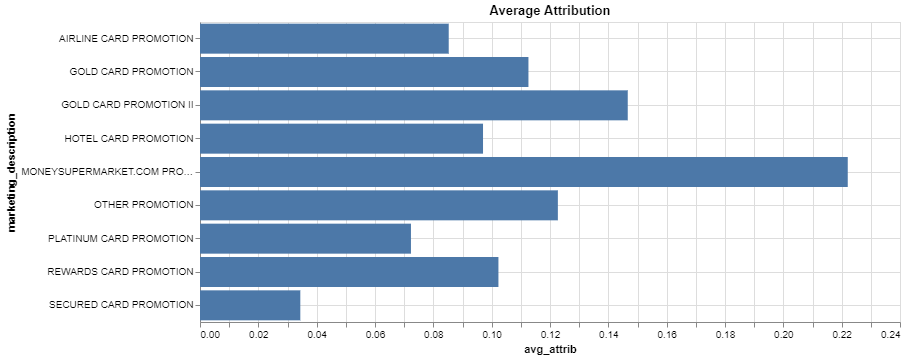

In [11]:
%chart x=avg_attrib, y=marketing_description, gridx=true, gridy=true, mark=bar, title="Average Attribution", width=700, height=300

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The above visualization is centered around the various promotions we have run. The larger the bar the more influence they had towards a customer opening an account. </p>



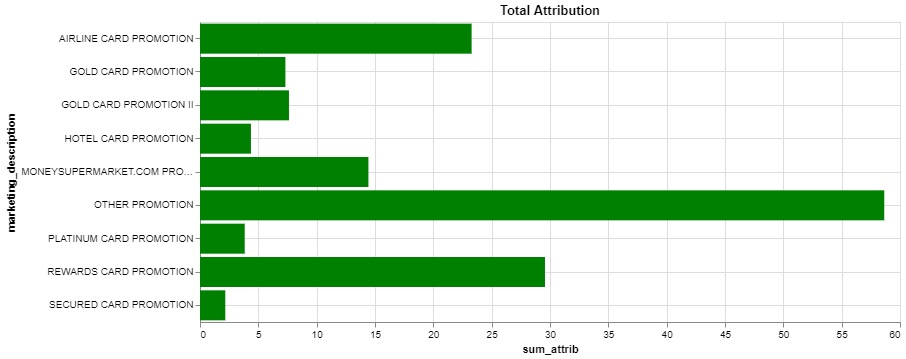

In [12]:
%chart x=sum_attrib, y=marketing_description, gridx=true, gridy=true, mark=bar, color=green, title="Total Attribution", width=700, height=300

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The chart above shows the total attribution score the promotion had. So, the biggest drivers of signups will be the longest. Here the OTHER PROMOTIONS followed by REWARDS CARD PROMOTION and then AIRLINE CARD PROMOTION. </p>



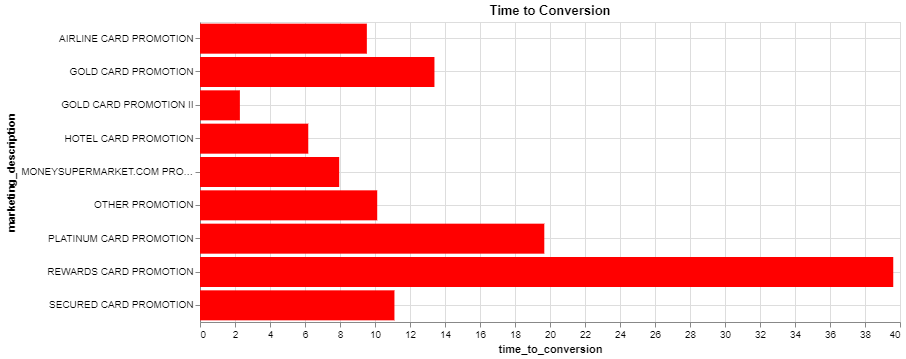

In [13]:
%chart x=time_to_conversion, y=marketing_description, gridx=true, gridy=true, mark=bar, color=red, title="Time to Conversion", width=700, height=300

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The above chart shows time to conversion, so how many hours on average that promotion took place before the user went ahead and signed up. The shorter time - the faster people took action. We can see that the Gold Card Promotion II did overall the best, followed by the Hotel card and MoneySupermarket.com promotions.  </p>

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>4. Channel analysis</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We have different promotions and advertising networks, now let's take a look at the traction we are getting with the various promotions across different channels:</p>

In [14]:
SELECT marketing_category, marketing_placement, SUM(attribution) AS total_attribution 
FROM FSCJ_marketing_attribution 
WHERE marketing_description NOT IN ('\N', '-1')
GROUP BY 1, 2;

,MARKETING_CATEGORY,MARKETING_PLACEMENT,total_attribution
1,EMAIL_ADVERTISING,EMAIL,22.43015873015873
2,INBRANCH,INBRANCH_REFERRAL,24.302777777777777
3,OFFSITE_DISPLAY_ADVERTISING,AFFILIATES,8.75
4,OFFSITE_DISPLAY_ADVERTISING,DOTOMI,0
5,SEARCH_ADVERTISING,GOOGLE,16.291666666666664
6,OFFSITE_DISPLAY_ADVERTISING,MINT.COM,4.309523809523809
7,OFFSITE_DISPLAY_ADVERTISING,FACEBOOK,4.17063492063492
8,ONSITE_DISPLAY_ADVERTISING,HOMEPAGE_BANNER,44.88333333333333
9,OFFSITE_DISPLAY_ADVERTISING,BLOOMBERG.COM,8.749999999999998
10,OFFSITE_DISPLAY_ADVERTISING,AOL,0


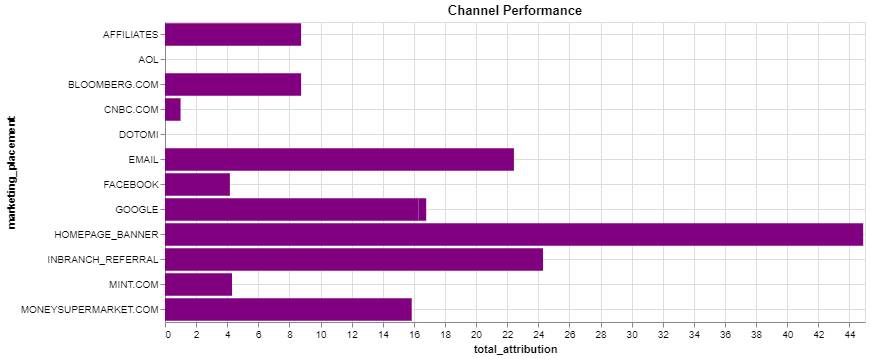

In [15]:
%chart x=total_attribution, y=marketing_placement, gridx=true, gridy=true, mark=bar, color=purple, title="Channel Performance", width=700, height=300

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>In the above chart we can see that the HOMEPAGE BANNER has resulted into maximum attribution and is the most effective.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The next visual revolves around the various channels where we ran our marketing. As a team, we observe that the length of the bar shows the overall total attribution to that channel. The colors correspond to the promotions that we looked at in the top view, allowing us to discern which promotions were on which channels and the performance of each. In our data result set, we can identify email, in-branch (offline), as well as web. </p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>For the digital channels - collectively, we can see that the homepage ads did the best, followed by email and Google searches.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Using a BI tool, we can take this analysis to another level. We do not have BI tool available in this environment, so we have captured a screen image displaying an analysis of data produced by the analysis we did using the queries above. </p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The Top chart shows the Total Attributions for various kinds of promotions. The biggest drivers are the promotions that have the largest circle size. </p>
<img  src="images/ChannelPerformance.png"/>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The chart below with vertical lines shows the various channels and the colors of the bars indicate the type of promotion. The larger the size of the colored bar , more the contribution of that promotion using the specified channel. </p>

<img  src="images/AttrSumm.png"/>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Now we can see the promotions and their success across the various channels. We collectively observe an interesting insight that the Money Supermarket promotion and the Gold Card Promotion II were our most effective promotions. It is intriguing for us to compare Gold Card II to the first Gold Card Promotion. Looking down at our channels, we can collectively see that the first Gold Card promotion was only run over email, and the Gold Card Promotion II was run on multiple channels, proving to be a lot more effective for the same exact product. </p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Using this dashboard and the power of Vantage, we can easily compare the different promotions. We also notice that we did a special promotion on MoneySupermarket.com that was particularly effective. This was only run on that particular channel and had both a quick time to conversion as well as strong average attribution. </p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Additionally, we can look at some other promotions. We collectively see that we did a Rewards Card promotion that performed well across channels but was particularly effective through in-branch referrals. The airline card promotion did the best on the homepage and Google compared to the other channels.</p>

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>5. Path To Adoption</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We want to see how our customers are opening higher end accounts such as wealth management. Many retail banks have found wealth management to be a key profit center, so they are looking to build their business in this area.</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Pathing is the process of discovering a sequence of antecedent actions that occur prior to a specific event of interest on sessionized data. Pathing discovers the most salient patterns across a group of individuals or entities based on which further actions are considered. Pathing allows you to provide an explanation of the relation and the relative importance of each factor.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The nPath® function provides a flexible pattern-matching capability that lets you specify complex patterns in the input data and define the values that are output for each matched input set. So, we can use the nPath® analytic function in ClearScape Analytics to do pattern/time series analysis that is very hard to do in simple SQL. We want to see the common paths that customers take when they go to open a wealth management account. We will also look at the affiliation between the other accounts that wealth management customers hold. </p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>In the code here you can see a few key points:</p>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'>We are concatenating the interaction and the product category to make unique events </li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'>We are ignoring the starting / completing of the wealth management application because everyone does that by definition and in this case we want to reduce the noise. Further analysis could be done later on incomplete applications or other scenarios.</li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'>The __'PATTERN'__ we are searching for is 4 events followed by opening (ACCOUNT_BOOKED) a Wealth Management account.</li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'>The __'SYMBOLS'__ we are using is anything but opening a wealth management account is 'EVENT' and opening said account is 'ADOPTION' </li>
</p>
<br>


In [16]:
SELECT TOP 5 *
FROM nPath (
    ON (
        SELECT
            customer_identifier,
            interaction_timestamp,
            interaction_type,
            product_category,
            interaction_type || '_' || product_category AS event,
            marketing_category,
            marketing_description,
            marketing_placement,
            sales_channel,
            conversion_sales,
            conversion_cost,
            conversion_margin
        FROM
            DEMO_Financial.Customer_Journey
        WHERE
            product_category <> '-1'
            AND interaction_type || '_' || product_category <> 'STARTS_APPLICATION_WEALTH MANAGEMENT'
            AND interaction_type || '_' || product_category <> 'COMPLETE_APPLICATION_WEALTH MANAGEMENT'
    )
    PARTITION BY
        customer_identifier
    ORDER BY
        interaction_timestamp
    USING
        MODE (NONOVERLAPPING)
        -- Limit to a depth of 4
        PATTERN ('(EVENT){4}.ADOPTION')
        SYMBOLS (
            event NOT LIKE 'ACCOUNT_BOOKED%_WEALTH MANAGEMENT' AS EVENT,
            event LIKE 'ACCOUNT_BOOKED%' AND product_category = 'WEALTH MANAGEMENT' AS ADOPTION
        )
    RESULT (
        ACCUMULATE(event OF ANY(EVENT, ADOPTION)) AS interaction_type_list,
        COUNT(event OF ANY(EVENT, ADOPTION)) AS click_depth,
        FIRST(customer_identifier OF ADOPTION) AS customer_identifier,
        FIRST(product_category OF ADOPTION) AS product_category
    )
) a;

,interaction_type_list,click_depth,customer_identifier,product_category
1,"[STARTS_APPLICATION_BROKERAGE, COMPARE_CHECKING, ACCOUNT_BOOKED_OFFLINE_BROKERAGE, OLB_CHECKING, ACCOUNT_BOOKED_OFFLINE_WEALTH MANAGEMENT]",5,108350971xmrixvo993049433,WEALTH MANAGEMENT
2,"[COMPLETE_APPLICATION_SAVINGS, ACCOUNT_BOOKED_ONLINE_SAVINGS, COMPARE_WEALTH MANAGEMENT, ENROLL_AUTO_SAVINGS_CHECKING, ACCOUNT_BOOKED_ONLINE_WEALTH MANAGEMENT]",5,106966564pzjxhia819813298,WEALTH MANAGEMENT
3,"[COMPLETE_APPLICATION_BROKERAGE, COMPARE_BROKERAGE, ACCOUNT_BOOKED_ONLINE_BROKERAGE, BROWSE_WEALTH MANAGEMENT, ACCOUNT_BOOKED_ONLINE_WEALTH MANAGEMENT]",5,113852197uxhbxhc635320451,WEALTH MANAGEMENT
4,"[COMPLETE_APPLICATION_BROKERAGE, COMPARE_BROKERAGE, ACCOUNT_BOOKED_ONLINE_BROKERAGE, REFERRAL_WEALTH MANAGEMENT, ACCOUNT_BOOKED_OFFLINE_WEALTH MANAGEMENT]",5,121227172molmfix560934233,WEALTH MANAGEMENT
5,"[COMPLETE_APPLICATION_SAVINGS, ACCOUNT_BOOKED_ONLINE_SAVINGS, BROWSE_WEALTH MANAGEMENT, COMPARE_WEALTH MANAGEMENT, ACCOUNT_BOOKED_ONLINE_WEALTH MANAGEMENT]",5,141814136krojbqa350350327,WEALTH MANAGEMENT


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>A visualization of this gives us lots of insight into the most common paths that users are taking when opening Wealth Management accounts. This is an SQL notebook, and we have another Notebook for same usecase which has python code for visualizations. A Sankey Diagram was created using the output (interacion_type_list) of the nPath® function used in the query above and below is the image for the nPath® function.</p>

<img  src="images/PathAnalysis.png"/>

<p style = 'font-size:16px;font-family:Arial;'>We can filter it down to the most popular paths:</p>

<img  src="images/PathForTopCust.png"/>

<p style = 'font-size:16px;font-family:Arial;'>The above diagram shows paths which have at least 16 customers on the path.  Of course, this notebook is just working with small data to demonstrate the functionality. In a real-world data volume, you’d be filtering for paths repeated hundreds or thousands of times. </p>
  
<p style = 'font-size:16px;font-family:Arial;'>So, let’s start by looking at the drivers of wealth management accounts online. We can see that the ‘Compare’ tool that the bank has on its’ website is a main step in opening an account. This allows you to compare its’ wealth management offerings to its competitors and this is proving to be very compelling. So, customers are browsing the offerings then using the compare tool and ultimately booking. </p>

<p style = 'font-size:16px;font-family:Arial;'>The other main drivers of online account signups are people signing up for an auto-savings plan. So, people that are savings minded tend to open wealth management accounts. Also, general browsing the offerings and opening a CD appear to be secondary paths as well. </p>

<p style = 'font-size:16px;font-family:Arial;'>Moving to offline - which we can see has different drivers. It appears to be predominately people that are opening other types of accounts as well such as CDs and Brokerage - both online and offline. We can see that the main path to booking a wealth management account offline is from in-branch referrals. So, people go into a branch and are opening another type of account and they are referred to opening a wealth management account as well!</p>

<b style = 'font-size:18px;font-family:Arial;color:#00233C'>Conclusion</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Thus, we can use the unique analytic capabilities of Vantage for understanding customer and user behavior over time. These analytic techniques can be applied at massive scale to derive more accurate results. Vantage allows organizations to scale models horizontally, by training segmented models per region, user type, etc., or vertically, by combining data from millions or billions of interactions. All of this can be deployed operationally to understand and predict actions in real-time.</p>

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>6. Cleanup </b></p>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Work Tables</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We need to clean up our work tables to prevent errors next time.</p>

In [17]:
DROP TABLE FSCJ_conversion_events;

Success: 14 rows affected

In [18]:
DROP TABLE FSCJ_attribution_model;

Success: 15 rows affected

In [19]:
DROP TABLE FSCJ_marketing_attribution;

Success: 24 rows affected

<p style = 'font-size:18px;font-family:Arial;color:#00233C'> <b>Databases and Tables </b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We will use the following code to clean up tables and databases created for this demonstration.</p>

In [20]:
call remove_data('DEMO_Financial');-- takes about 10 seconds, optional if you want to use the data later

Success: 0 rows affected

Success: 0 rows affected

,Message
1,Removed objects related to DEMO_Financial. That ran for 0:00:04.19



<hr style="height:2px;border:none;background-color:#00233C;">

<b style = 'font-size:20px;font-family:Arial;color:#00233C'>Required Materials</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let’s look at the elements we have available for reference for this notebook:</p>

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Dataset</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The data for this use case is stored in the `FSCustomerJourney` database. </p>

<b style = 'font-size:18px;font-family:Arial;color:#00233C'>Integrated Contact History </b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The data for this use case is taken from Customer_Journey table(Details below) from the DEMO_FSCustomerJourney Database. It is data from various source systems and channels already combined and put into one big table. This is all of the customer interactions, in a customer system this might be a view on top of various source tables.</p>

`Customer_Journey`

- `customer_skey`: customer key
- `customer_identifier`: unique customer identifier
- `customer_cookie`: cookie placed on customers device
- `customer_online_id`: boolean - does the customer have an online account
- `customer_offline_id`: customer account number
- `customer_type`: is this a high value customer or just a vistor browsing the website?
- `customer_days_active`: how long has the customer been active
- `interaction_session_number`: session identifier
- `interaction_timestamp`: timestamp for this event
- `interaction_source`: channel this event is from (online / offline, in branch etc.)
- `interaction_type`: type of event
- `sales_channel`: channel a sales event was in
- `conversion_id`: sales conversion identifier
- `product_category`: what type of product the event concerned (checking, savings, cd etc..)
- `product_type`: unused
- `conversion_sales`: unused
- `conversion_cost`: unused
- `conversion_margin`: unused
- `conversion_units`: unused
- `marketing_code`: marketing identifier
- `marketing_category`: marketing channel (inbranch, website, email etc..)
- `marketing_description`: marketing campaign name
- `marketing_placement`: specific marketing outlet (Google, Bloomberg.com etc..)
- `mobile_flag`: boolean was on a mobile device
- `updt`: unused

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Filters:</b></p>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Industry:</b> Finance</li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Functionality:</b> Pathing Analysis</li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Use Case:</b> Customer Journeys</li>
</p>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Related Resources:</b></p>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'><a href = 'https://www.teradata.com/blogs/nps-is-a-metric-not-the-goal'>In the fight to improve customer experience, NPS is a metric, not the goal</a></li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'><a href = 'https://www.teradata.com/Blogs/Customer-360-Analytics-What-Lies-Ahead'>Customer 360 Analytics, What Lies Ahead?</a></li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'><a href = 'https://teradata.seismic.com/app#/doccenter/dc7eb2cf-bd2e-462a-a056-fcc02c9fd2f2/doc/%252Fddb2fe9eb1-f754-d3df-07fa-0724e0ddd3e9%252FdfODEyNmNlZmEtZmM4Mi00ODUyLTgzZTAtOTEzMTBlODQ5YjUw%252CPT0%253D%252CVmlkZW8%253D%252FdfYmI3ODY3ZDQtM2Q4Zi00ZTk5LTg2ZDYtNjBlZTk4ODY2YTY4%252CPT0%253D%252CRXh0ZXJuYWwgQXVkaWVuY2Vz%252Flfda62602b-d188-4769-aa36-a58d162732fd//?mode=view&parentPath=sessionStorage'>Broken Digital Journeys CX Solution Accelerator Demo via Vantage Console Demo</a></li>


<footer style="padding-bottom:35px; background:#f9f9f9; border-bottom:3px solid #00233C">
    <div style="float:left;margin-top:14px">ClearScape Analytics™</div>
    <div style="float:right;">
        <div style="float:left; margin-top:14px">
            Copyright © Teradata Corporation - 2023. All Rights Reserved
        </div>
    </div>
</footer>